In [41]:
from bs4 import BeautifulSoup
import urllib
import re
import pandas as pd
import requests
from urllib.request import urlopen
import collections
from urllib.parse import urljoin
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import RegexpTokenizer
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import itertools
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/drazenzack/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [99]:
def cleanhtml(raw_html):
    cleanr = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    cleantext = re.sub(cleanr, '', raw_html)
    return(cleantext)

tokenizer = RegexpTokenizer(r'\w+')
def token(x):
    ww = tokenizer.tokenize(x)
    return(ww)

stop = stopwords.words('english')
stop.extend(['day','ago'])
def remove_stopwords(x):
    words = [w for w in x if w not in stop]
    return(words)

lemm = WordNetLemmatizer()

def word_lem(x):
    lem_text = " ".join(lemm.lemmatize(i) for i in x)
    return(lem_text)

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return(words_freq[:n])

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return(words_freq[:n])

def single_word(x, y):
    common_words = get_top_n_words(x['text'], 20)
    df4 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
    n_words = pd.DataFrame(df4.groupby('ReviewText').sum()['count'].sort_values(ascending=False))
    n_words.reset_index(inplace = True)
    print(n_words)
    plot_count(n_words, y)
    
def bi_word(x, y):
    common_words = get_top_n_bigram(x['text'], 20)
    df4 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
    n_words = pd.DataFrame(df4.groupby('ReviewText').sum()['count'].sort_values(ascending=False))
    n_words.reset_index(inplace = True)
    print(n_words)
    plot_count(n_words, y)
    

In [121]:
def plot_count(x,title):
    sns.set()
    plt.figure(figsize = (20,9))
    sns.barplot(x='ReviewText', y='count', data=x).set_title(title,fontsize=20)
    plt.xlabel('Words',fontsize=20)
    plt.ylabel('Count',fontsize=20)
    plt.xticks(rotation=45, fontsize = 15)
    plt.yticks(fontsize = 15)
    ax = plt.gca()
    for nr, p in enumerate(ax.patches):
        height = round(p.get_height(),0)
        ax.text(nr, height + 2.5,'{}'.format(height), color='black',fontsize=15,  ha='center', va='center')

In [101]:
def getlink(url,x):
    text_list = []
    for i in range(x): 
        page = urlopen(url)
        soup = BeautifulSoup(page, 'lxml')
        all_matches = soup.findAll(attrs={'rel':['nofollow']})
        for c in all_matches:
            jd_url = 'http://www.indeed.com/m/'+c['href']
            response = requests.get(jd_url)
            jd_page = response.text
            jd_soup = BeautifulSoup(jd_page, 'lxml')
            jd_desc = jd_soup.findAll('div',attrs={'id':['desc']})
            text = ' '.join(map(str, jd_desc)) 
            text = cleanhtml(text)
            text = text.replace('\n','')
            text_list.append(text)
    
        url_all = soup.findAll(attrs={'rel':['next']})
        print(url_all)

        url = 'http://www.indeed.com/m/'+ str(url_all[0]['href'])
    df = pd.DataFrame(text_list, columns = ['text'])
    df['text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
    df['text'] = df['text'].replace('\d+', '', regex=True)
    df['text'] = df['text'].apply(token)
    df['text'] = df['text'].apply(remove_stopwords)
    df['text'] = df['text'].apply(word_lem)
    return(df)  

### Manger

In [102]:
df2 = getlink("https://www.indeed.com/m/jobs?q=manager&l=",10)

[<link href="jobs?q=manager&amp;l=&amp;start=10" rel="next"/>]
[<link href="jobs?q=manager&amp;l=&amp;start=20" rel="next"/>]
[<link href="jobs?q=manager&amp;l=&amp;start=30" rel="next"/>]
[<link href="jobs?q=manager&amp;l=&amp;start=40" rel="next"/>]
[<link href="jobs?q=manager&amp;l=&amp;start=49" rel="next"/>]
[<link href="jobs?q=manager&amp;l=&amp;start=59" rel="next"/>]
[<link href="jobs?q=manager&amp;l=&amp;start=69" rel="next"/>]
[<link href="jobs?q=manager&amp;l=&amp;start=79" rel="next"/>]
[<link href="jobs?q=manager&amp;l=&amp;start=89" rel="next"/>]
[<link href="jobs?q=manager&amp;l=&amp;start=99" rel="next"/>]


     ReviewText  count
0         store    365
1      customer    337
2          team    300
3          work    261
4       service    250
5    experience    245
6       manager    236
7    management    179
8       company    176
9           job    173
10      ability    173
11         year    169
12     business    163
13         sale    156
14     employee    126
15  performance    121
16         time    119
17      product    115
18    associate    113
19        skill    112


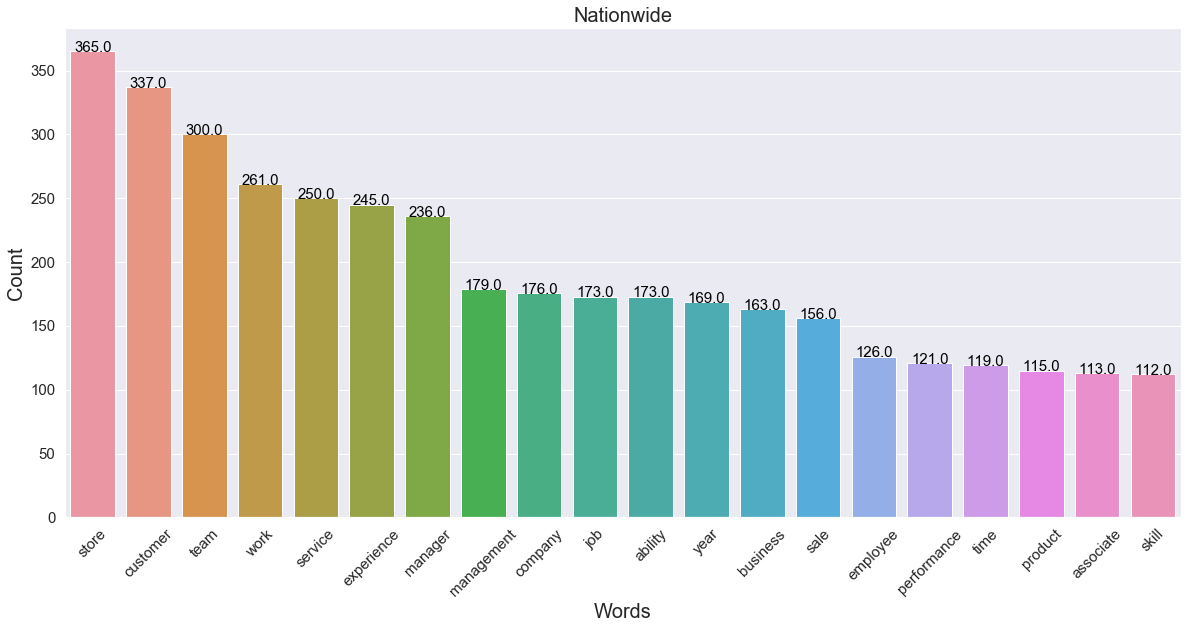

In [122]:
single_word(df2, 'Nationwide')

               ReviewText  count
0        customer service     94
1           store manager     52
2               type full     47
3        policy procedure     38
4          year preferred     36
5         full timesalary     33
6     customer experience     29
7            ability work     25
8                job type     25
9       equal opportunity     23
10           location one     23
11  management experience     23
12        management year     23
13        year experience     22
14          year required     22
15            high school     21
16       district manager     21
17   opportunity employer     20
18             fast paced     19
19            team member     19


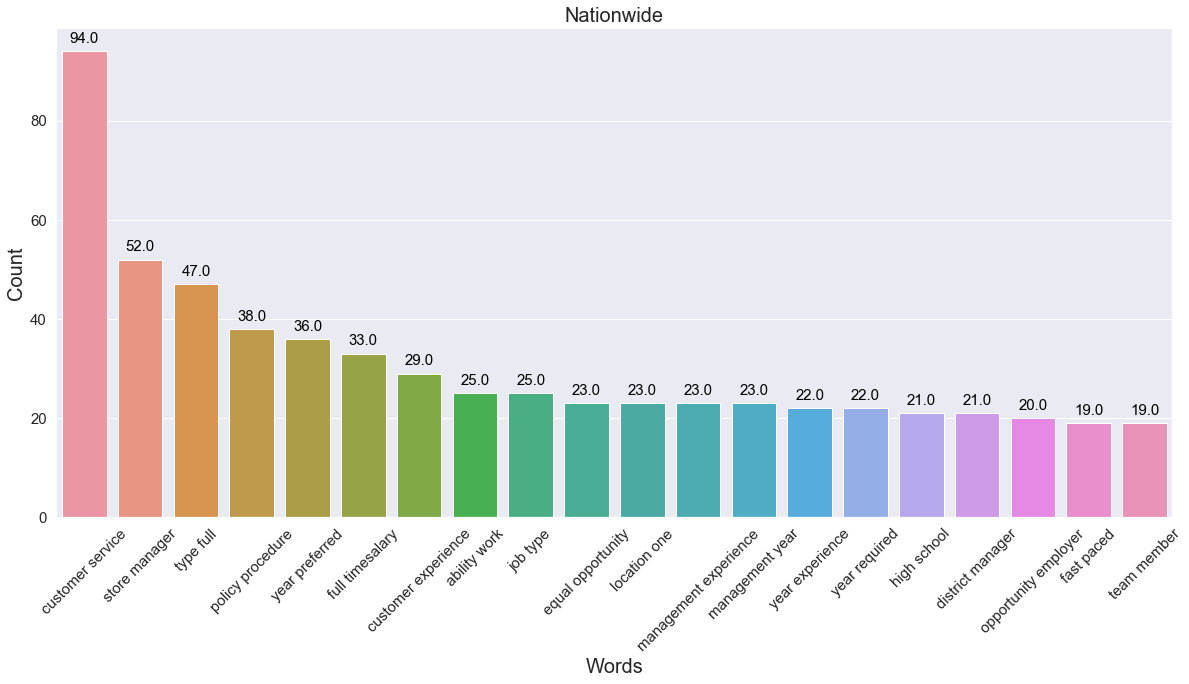

In [123]:
bi_word(df2, 'Nationwide')

### New York 

In [105]:
ny = getlink("https://www.indeed.com/m/jobs?q=manager&l=New+York",10)

[<link href="jobs?q=manager&amp;l=New+York&amp;start=10" rel="next"/>]
[<link href="jobs?q=manager&amp;l=New+York&amp;start=20" rel="next"/>]
[<link href="jobs?q=manager&amp;l=New+York&amp;start=30" rel="next"/>]
[<link href="jobs?q=manager&amp;l=New+York&amp;start=40" rel="next"/>]
[<link href="jobs?q=manager&amp;l=New+York&amp;start=50" rel="next"/>]
[<link href="jobs?q=manager&amp;l=New+York&amp;start=60" rel="next"/>]
[<link href="jobs?q=manager&amp;l=New+York&amp;start=70" rel="next"/>]
[<link href="jobs?q=manager&amp;l=New+York&amp;start=80" rel="next"/>]
[<link href="jobs?q=manager&amp;l=New+York&amp;start=90" rel="next"/>]
[<link href="jobs?q=manager&amp;l=New+York&amp;start=100" rel="next"/>]


     ReviewText  count
0         store    304
1          team    283
2          work    267
3      customer    265
4    experience    261
5       service    232
6    management    206
7       manager    204
8       ability    201
9       company    173
10          job    155
11         year    155
12         time    150
13     training    142
14     employee    141
15    operation    132
16     required    130
17  performance    129
18          new    125
19   department    124


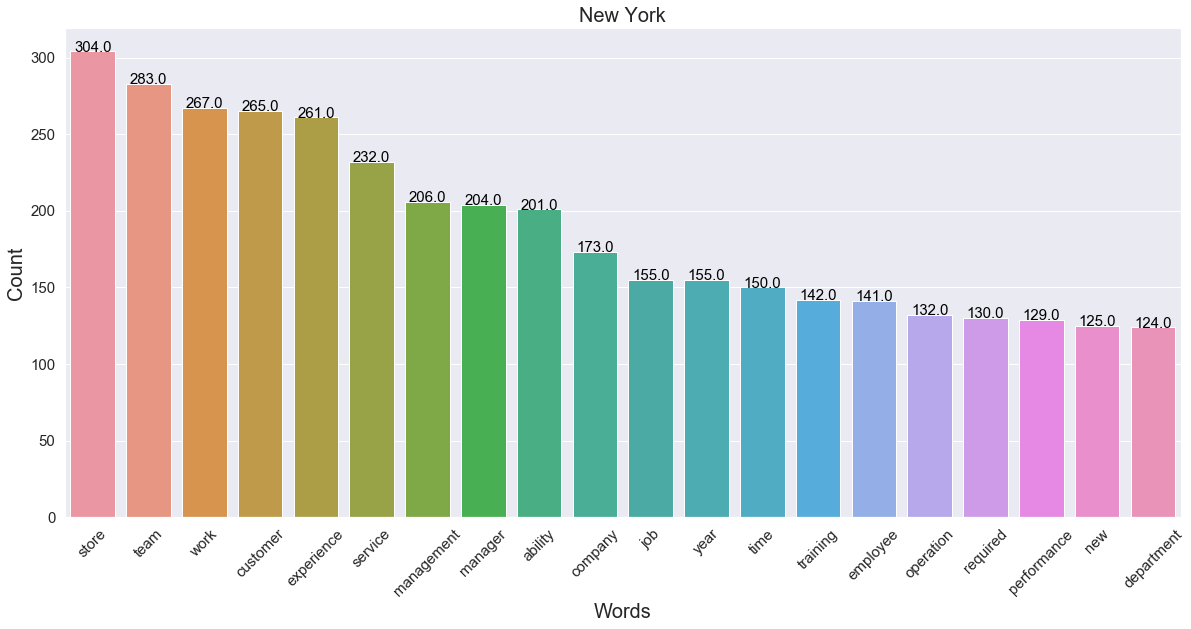

In [124]:
single_word(ny, 'New York')

             ReviewText  count
0      customer service     85
1      policy procedure     49
2           team member     44
3             type full     42
4         store manager     42
5              new york     41
6        company policy     37
7    accordance company     30
8   customer experience     28
9          ability work     25
10      full timesalary     25
11       office manager     24
12       year preferred     23
13           fast paced     21
14     store management     21
15         location one     20
16          call center     20
17  communication skill     19
18        healthy boost     19
19      year experience     18


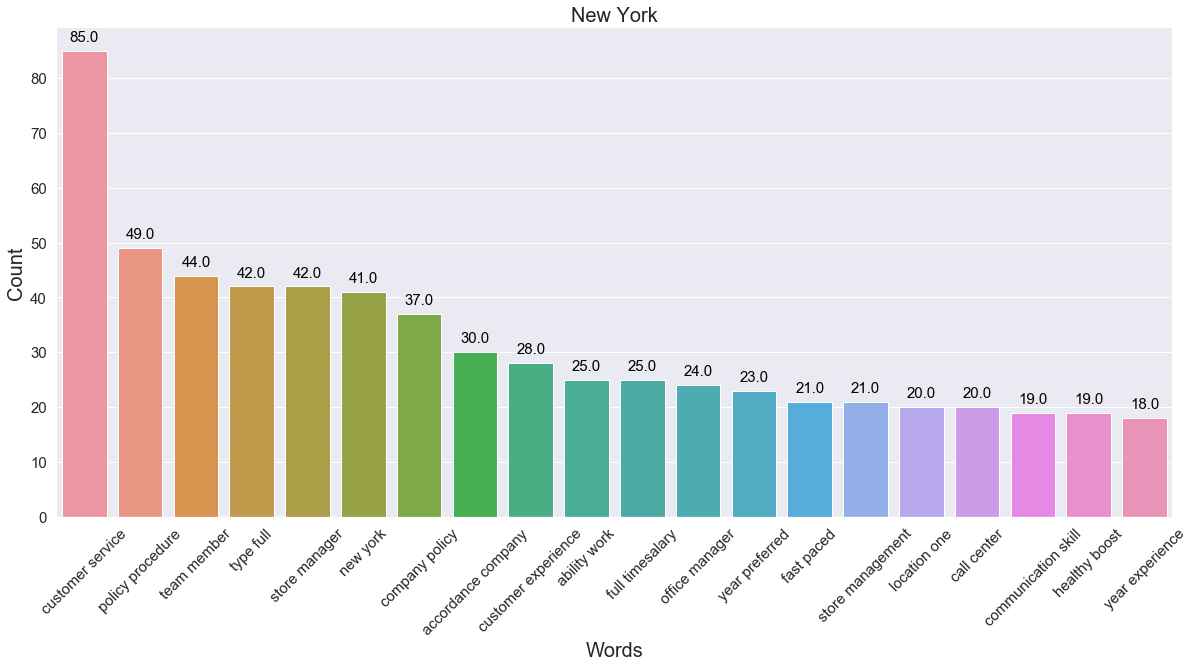

In [125]:
bi_word(ny, 'New York')

### Director

In [108]:
la = getlink("https://www.indeed.com/m/jobs?q=director&l=",10)

[<link href="jobs?q=director&amp;l=&amp;start=10" rel="next"/>]
[<link href="jobs?q=director&amp;l=&amp;start=20" rel="next"/>]
[<link href="jobs?q=director&amp;l=&amp;start=30" rel="next"/>]
[<link href="jobs?q=director&amp;l=&amp;start=40" rel="next"/>]
[<link href="jobs?q=director&amp;l=&amp;start=50" rel="next"/>]
[<link href="jobs?q=director&amp;l=&amp;start=60" rel="next"/>]
[<link href="jobs?q=director&amp;l=&amp;start=70" rel="next"/>]
[<link href="jobs?q=director&amp;l=&amp;start=80" rel="next"/>]
[<link href="jobs?q=director&amp;l=&amp;start=90" rel="next"/>]
[<link href="jobs?q=director&amp;l=&amp;start=100" rel="next"/>]


     ReviewText  count
0       service    271
1    experience    234
2       program    212
3          team    201
4          work    191
5      director    191
6      customer    182
7    management    166
8          year    149
9      employee    130
10        skill    126
11          new    124
12      ability    123
13    community    116
14  development    115
15        staff    114
16    operation    113
17    including    113
18       ensure    111
19     required    110


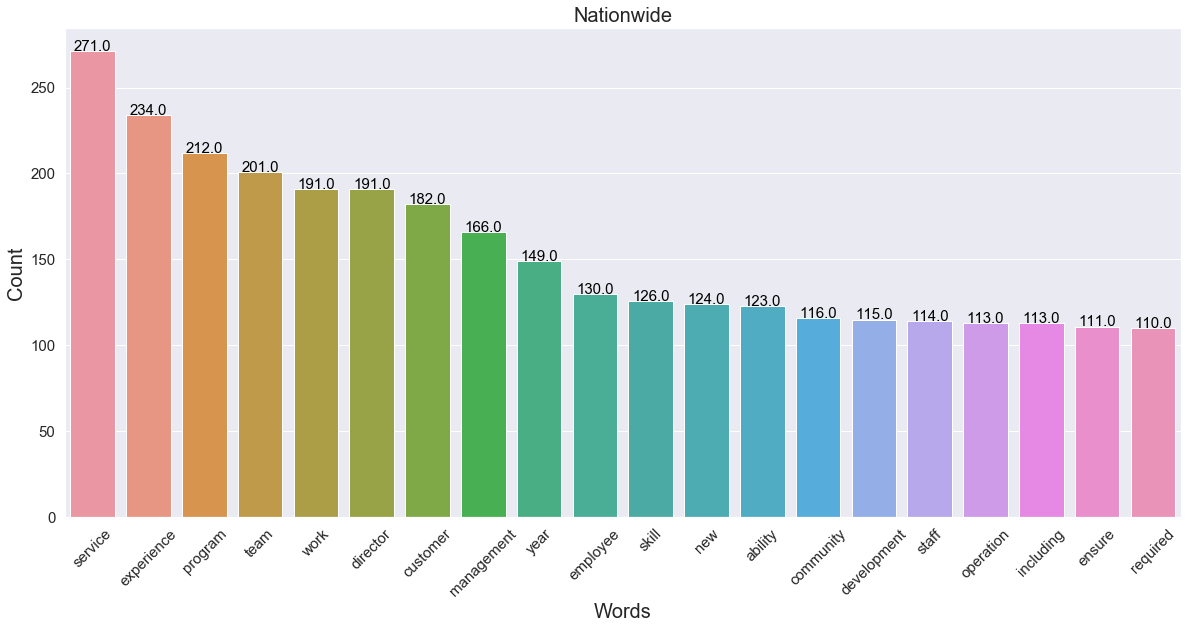

In [126]:
single_word(la, 'Nationwide')

              ReviewText  count
0       policy procedure     39
1         human resource     35
2       customer service     34
3             new jersey     32
4        year experience     28
5              type full     25
6      equal opportunity     25
7              long term     24
8    communication skill     23
9          related field     22
10    independent living     21
11             full time     21
12       bachelor degree     20
13              job type     20
14         state federal     20
15    executive director     19
16  opportunity employer     18
17         skill ability     18
18           team member     17
19        year preferred     17


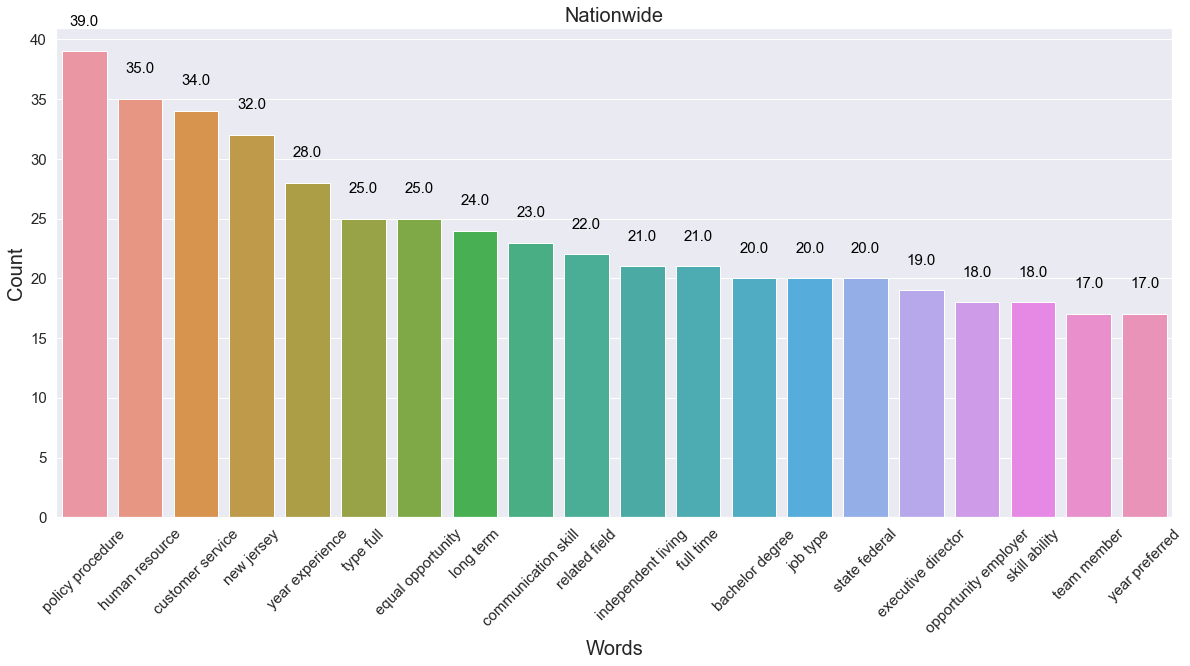

In [127]:
bi_word(la, 'Nationwide')